<a href="https://colab.research.google.com/github/LongLongoooo/AIO_233/blob/AIO_Module_4/M04W03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0


Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 13.0MB/s]


In [2]:
import numpy as np

**Load data from file**

In [3]:
def load_data_from_file(filename="/content/advertising.csv"):
  data = np.genfromtxt(filename, dtype=None, delimiter=",", skip_header=1)
  features_X = data[:, :3]
  sales_y = data[:, 3]
  features_X_b = np.c_[np.ones((data.shape[0], 1)), features_X]
  return features_X_b, sales_y

features_X, sales_y = load_data_from_file()
print(features_X[:5, :])
print(sales_y.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


**Create Individual**

In [18]:
def create_individual(n=4, bound=10):
  individual = np.random.uniform((-bound/2), (bound/2), size=n).reshape(-1,1)
  return individual

individual = create_individual()
print(individual)

[[ 0.49012555]
 [-3.43440135]
 [ 0.31793008]
 [ 1.34140393]]


**Compute Fitness**

In [19]:
def compute_loss(individual):
  _, sales_Y = load_data_from_file()
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat - sales_Y),(y_hat - sales_Y)).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 0
  fitness_value += 1/ (loss + 1)
  return fitness_value

features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


**Crossover**

In [20]:
def crossover(individual1, individual2, crossover_rate=0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()

  for i in range(len(individual1)):
    if np.random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]

  return individual1_new, individual2_new

# question 5
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2, 2.0)
print (" individual1 : ", individual1 )
print (" individual2 : ", individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


**Mutation**

In [21]:
import numpy as np

def mutate(individual, mutation_rate=0.05, mutation_strength=0.5):
    individual_m = individual[:]  # Shallow copy of the list
    individual_m = [individual_m[i] + np.random.uniform(-mutation_strength, mutation_strength)
                    if np.random.random() < mutation_rate
                    else individual_m[i]
                    for i in range(len(individual_m))]
    return individual_m




In [22]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate= 2.0)
print(before_individual == after_individual)

False


**Create Population**

In [23]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population


**Selection**

In [43]:
import random

def selection(sorted_old_population):
    m = len(sorted_old_population)
    index1 = random.randint(0, m-1)

    # If index1 == index2 => continue random index2 until index1 != index2
    while True:
        index2 = random.randint(0, m-1)
        if index1 != index2:
            break

    # Select the better-ranked individual (lower index is better in a sorted population)
    individual_s = sorted_old_population[index1]
    if index2 < index1:
        individual_s = sorted_old_population[index2]

    return individual_s




**Create_new_population**

In [83]:
def create_new_population(old_population, elitism=2, gen = 1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)
  if gen%1 == 0:
    print("Best loss: ", compute_loss(sorted_population[m-1]), "with chromosome ", sorted_population[m-1])
  new_population = []
  while len(new_population) < (m-elitism):
      # Selection
      parent1, parent2 = selection(sorted_population), selection(sorted_population)

      # Crossover
      child1, child2 = crossover(parent1, parent2, crossover_rate=0.9)

      # Mutation and append
      child1 = mutate(child1)
      new_population.append(child1)

      if len(new_population) < (m - elitism):
        child2 = mutate(child2)
        new_population.append(child2)

  # copy elitism chromosomes that have best fitness score to the next generation
  for ind in sorted_population [m- elitism :]:
    new_population.append(ind)

  return new_population, compute_loss(sorted_population[m-1])
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2, gen =1)

Best loss:  123415.051528805 with chromosome  [3.44, 2.57, -0.79, -2.41]


**All in One**

In [96]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)

    # Sort the population by fitness (ascending, assuming lower fitness is better)
    sorted_population = sorted(old_population, key=compute_loss)

    # Create a new population
    new_population = []

    # Generate offspring until new population has enough individuals (excluding elitism)
    while len(new_population) < (m - elitism):
        # Selection of two parents
        parent1, parent2 = selection(sorted_population), selection(sorted_population)

        # Crossover to generate two children
        child1, child2 = crossover(parent1, parent2, crossover_rate=0.9)

        # Mutation of the children
        child1 = mutate(child1, mutation_rate=0.05)  # Adjust mutation rate
        new_population.append(child1)  # Append the mutated child1

        # Add child2 only if we still need more individuals
        if len(new_population) < (m - elitism):
            child2 = mutate(child2, mutation_rate=0.05)
            new_population.append(child2)

    # Copy the best elitism individuals (those with the best fitness scores)
    for ind in sorted_population[:elitism]:  # Best individuals at the start (smallest loss)
        new_population.append(ind)

    # Calculate the loss for the best individual in the sorted population
    best_individual = sorted_population[0]
    best_loss = compute_loss(best_individual)

    return new_population, best_loss

def run_GA(n_generation, population_size):
    # Load data (assumed to be features and labels)
    feature_X, sales_Y = load_data_from_file()

    # Initialize the population
    population = initializePopulation(population_size)

    # List to keep track of losses for each generation
    losses_list = []

    # Run the GA for the specified number of generations
    for i in range(n_generation):
        # Generate new population and compute loss for this generation
        population, loss = create_new_population(population, gen=i)

        # Track loss for the current generation
        losses_list.append(loss)

        # Optionally print or monitor progress
        print(f"Generation {i+1}/{n_generation} - Loss: {loss}")

    # Return the list of losses across generations
    return population, losses_list


In [100]:
population,losses_list = run_GA(n_generation=100, population_size=600)

Generation 1/100 - Loss: 278.5521805155698
Generation 2/100 - Loss: 278.5521805155698
Generation 3/100 - Loss: 147.89441787841554
Generation 4/100 - Loss: 90.52193305047487
Generation 5/100 - Loss: 90.52193305047487
Generation 6/100 - Loss: 90.52193305047487
Generation 7/100 - Loss: 90.52193305047487
Generation 8/100 - Loss: 77.67565470387619
Generation 9/100 - Loss: 74.49290897112658
Generation 10/100 - Loss: 74.49290897112658
Generation 11/100 - Loss: 59.864365158274936
Generation 12/100 - Loss: 59.864365158274936
Generation 13/100 - Loss: 53.364410350492896
Generation 14/100 - Loss: 53.364410350492896
Generation 15/100 - Loss: 48.96517683690085
Generation 16/100 - Loss: 48.96517683690085
Generation 17/100 - Loss: 48.08463000920037
Generation 18/100 - Loss: 46.19829272679897
Generation 19/100 - Loss: 46.19829272679897
Generation 20/100 - Loss: 46.19829272679897
Generation 21/100 - Loss: 45.616604811418064
Generation 22/100 - Loss: 45.616604811418064
Generation 23/100 - Loss: 45.25827

**Visualization Loss**

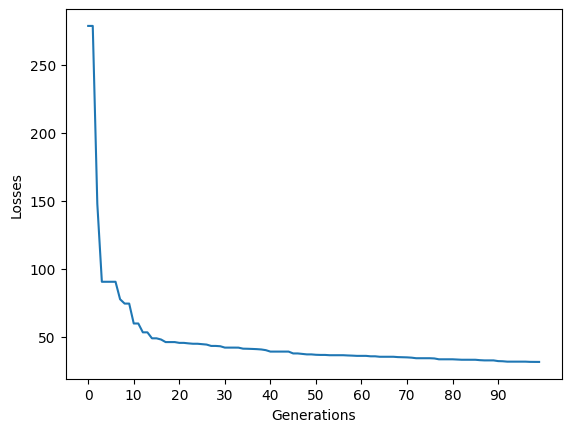

In [107]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list, n_generation=100):
    plt.plot(losses_list)
    plt.xlabel("Generations")

    # Set xticks at intervals of 10
    plt.xticks(ticks=range(0, n_generation, 10),
               labels=[str(i) for i in range(0, n_generation, 10)])

    plt.ylabel("Losses")
    plt.show()

visualize_loss(losses_list, n_generation=100)

**Visualization Predicted Price**

[array([10.08708794]), array([0.01686507]), array([0.04472189]), array([0.03089231])]


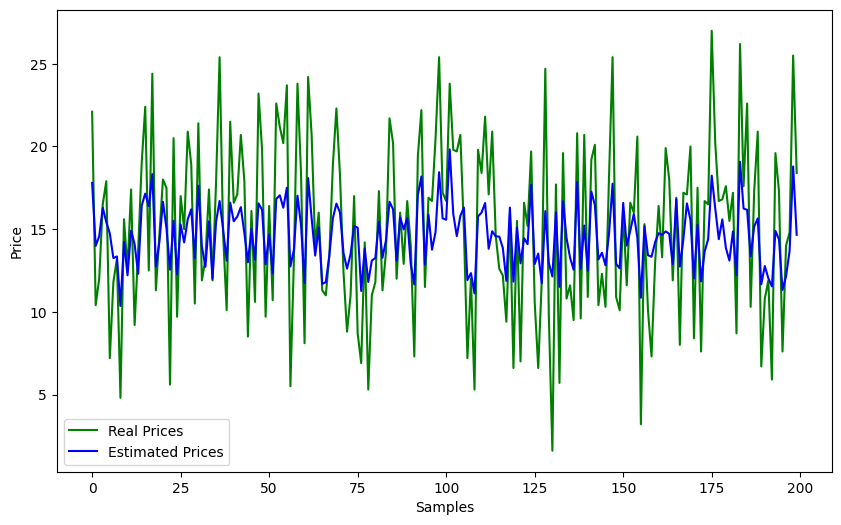

In [108]:
def visualize_predict_gt(population):
  # Visualize of ground truth and predict value
  sorted_population = sorted(population, key=compute_loss)
  print(sorted_population[0])
  theta = np.array(sorted_population[0])

  estimated_prices = []
  for feature in features_X:
    predicted_price = feature.dot(theta)
    estimated_prices.append(predicted_price)

  fig , ax = plt . subplots ( figsize =(10 , 6))
  plt . xlabel ('Samples')
  plt . ylabel ('Price')
  plt . plot ( sales_Y , c='green', label ='Real Prices')
  plt . plot ( estimated_prices , c='blue', label ='Estimated Prices')
  plt . legend ()
  plt . show ()

visualize_predict_gt(population)